In [2]:
import lightkurve as lk
from lightkurve import search_targetpixelfile

In [4]:
lc = lk.search_lightcurve('TIC 441420236')
lc = lc.download()

c:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\search.py:352: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

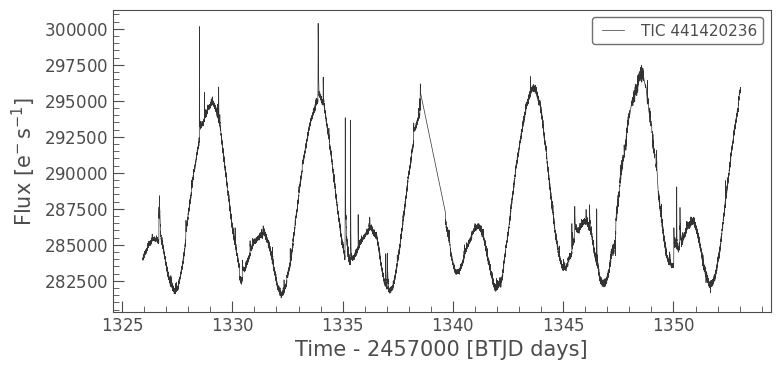

In [5]:
lc.plot()

In [5]:
tpf_file = lk.search_targetpixelfile('TIC 6663331', mission="TESS")#.download(quality_bitmask='default')
tpf_file

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 13,2019,SPOC,120,6663331,0.0
1,TESS Sector 13,2019,TESS-SPOC,1800,6663331,0.0


In [6]:
tpf_file = tpf_file[0].download(quality_bitmask='default',author='SPOC')

<AxesSubplot:title={'center':'Target ID: 6663331, Cadence: 307055'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

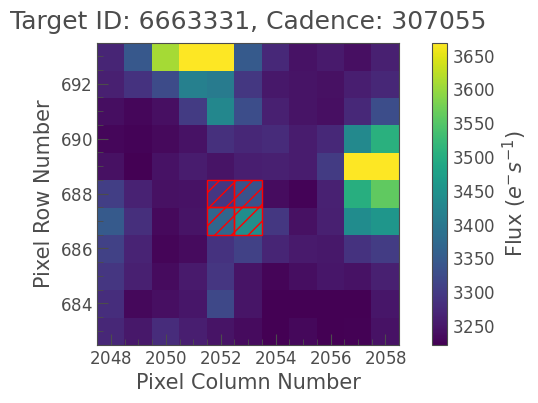

In [7]:
tpf_file.hdu[2]
tpf_file.plot(aperture_mask=tpf_file.pipeline_mask)

In [61]:
result = lk.search_tesscut('TIC 316295827')
tpf = result.download(cutout_size=10)

c:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


<AxesSubplot:title={'center':'Target ID: TIC 316295827, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

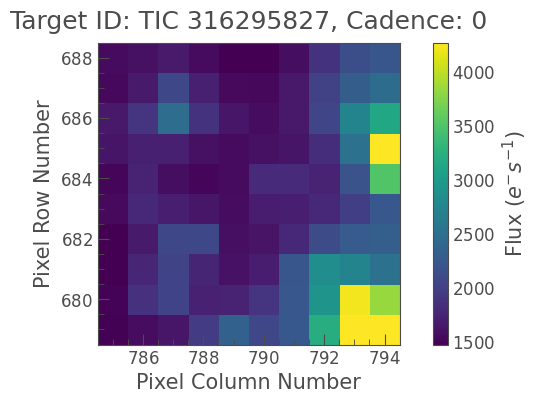

In [63]:
tpf.plot()

In [53]:
aperture_mask = tpf.create_threshold_mask(threshold=15,reference_pixel='center')

<AxesSubplot:title={'center':'Target ID: TIC 6663331, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

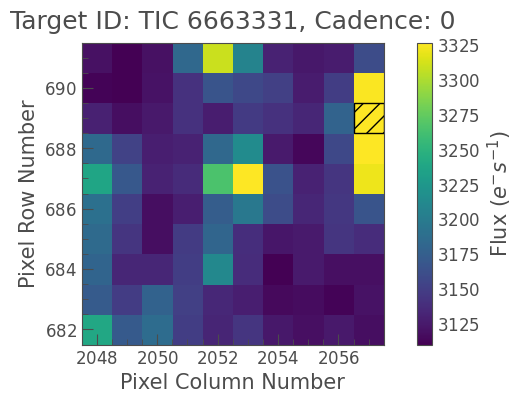

In [54]:
tpf.plot(aperture_mask=aperture_mask,mask_color='k')

In [12]:
result = lk.search_tesscut('TIC 6663331')
tpf = result.download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 6663331, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

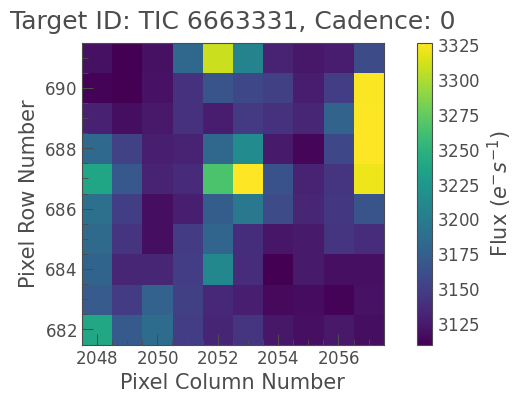

In [13]:
tpf.plot()

In [129]:
def generate_cutout(tic_id:str='',large_size:int=30,small_size:int=5):
    import matplotlib.pyplot as plt
    import lightkurve as lk
    from matplotlib.patches import Rectangle
    import os

    os.mkdir('temp')

    result = lk.search_tesscut(tic_id)
    small_tpf = result.download(cutout_size=small_size)
    large_tpf = result.download(cutout_size=large_size)
    fig = plt.figure()
    fig, ax = plt.subplots()
    small_tpf.plot(ax=ax)
    rect_x = ax.get_xlim()[1]-ax.get_xlim()[0]
    rect_y = ax.get_ylim()[1]-ax.get_ylim()[0]
    plt.savefig('temp/small.pdf')
    fig1, ax1 = plt.subplots()
    large_tpf.plot(ax=ax1)
    ax1.add_patch(Rectangle((ax.get_xlim()[0],ax.get_ylim()[0]),rect_x,rect_y,fc='none',linewidth=1,ec='red'))
    plt.savefig('temp/final.pdf')

    os.remove('temp')
    

<Figure size 432x288 with 0 Axes>

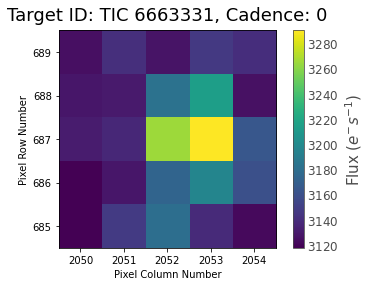

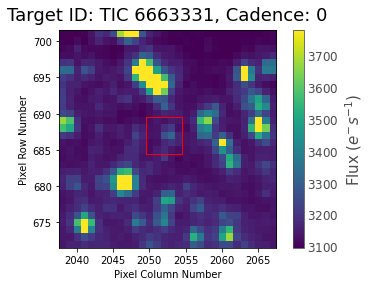

In [130]:
generate_cutout('TIC 6663331')

<AxesSubplot:title={'center':'Target ID: TIC 6663331, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

<Figure size 432x288 with 0 Axes>

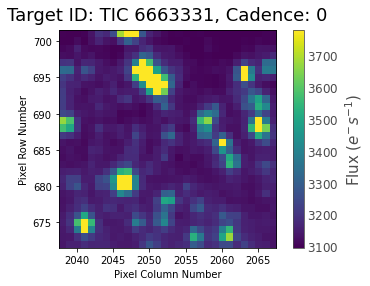

In [74]:
import matplotlib.pyplot as plt
result = lk.search_tesscut('TIC 6663331')
tpf = result.download(cutout_size=30)
fig = plt.figure()
fig, ax = plt.subplots()
tpf.plot(ax=ax)


In [81]:
ax.get_xlim()[0]

2037.5

In [11]:
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", quarter=4, cadence="long").download()

In [12]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

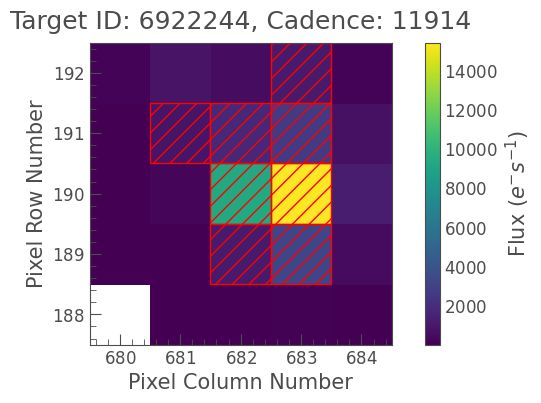

In [13]:
tpf.plot(aperture_mask=tpf.pipeline_mask)